In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df.head()


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [8]:
scores_df = pd.DataFrame({'score':scores}, 
                         index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                                             name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [9]:
sum(scores)/len(scores)
#평균값

np.float64(55.0)

In [10]:
np.mean(scores)
#평균값

np.float64(55.0)

In [12]:
#중앙값, 데이터에 큰 이상값이 있는 경우 대푯값으론 중앙값을 활용.../점수 크기순으로 나열하기
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [15]:
#중앙값 정의하기, -1하는 이유는 파이썬 리스트는 0부터 시작하니까 그거 감안.
n = len(sorted_scores)
if n %2==0:
    m0=sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 +m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

np.float64(56.5)

In [16]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [17]:
#편차 알아보기
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [18]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [19]:
np.mean(deviation)

np.float64(0.0)

In [20]:
np.mean(another_deviation)

np.float64(0.0)

In [21]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df
#그냥 하면 상쇄되니까 편차 제곱 즉 분산 이용할거임

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [22]:
summary_df.mean

<bound method DataFrame.mean of          score  deviation
student                  
A           42      -13.0
B           69       14.0
C           56        1.0
D           41      -14.0
E           57        2.0
F           48       -7.0
G           65       10.0
H           49       -6.0
I           65       10.0
J           58        3.0>

In [23]:
np.mean(deviation **2)

np.float64(86.0)

In [24]:
np.var(scores)
#분산 구하는 함수

np.float64(86.0)

In [25]:
summary_df['square of deviation'] = np.square(deviation)
summary_df
#summary_df에 분산 열 추가

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [26]:
np.sqrt(np.var(scores, ddof=0))
#표준편차

np.float64(9.273618495495704)

In [27]:
np.std(scores, ddof = 0)
#표준편차 함수

np.float64(9.273618495495704)

In [28]:
#범위
np.max(scores) - np.min(scores)

np.int64(28)

In [30]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

np.float64(15.0)

In [32]:
#지금까지 다룬 지표 한방에 보여주는 메서드_describe 
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [33]:
z = (scores - np.mean(scores)) / np.std(scores)
z
#표준화

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [ ]:
#표준화된 데이터는 평균이 0, 표준편차가 1

In [34]:
z = 50+10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [35]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [37]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [39]:
freq,_ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [40]:
#0~20, 10~e20, ...라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
#freq_class를 인덱스로 DataFrame작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [41]:
#계급값. 각 계급의 중앙값을 이용
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [42]:
#상대도수. 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [43]:
#누적상대도수 해당 계급가지의 상대도수의 합.
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [45]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

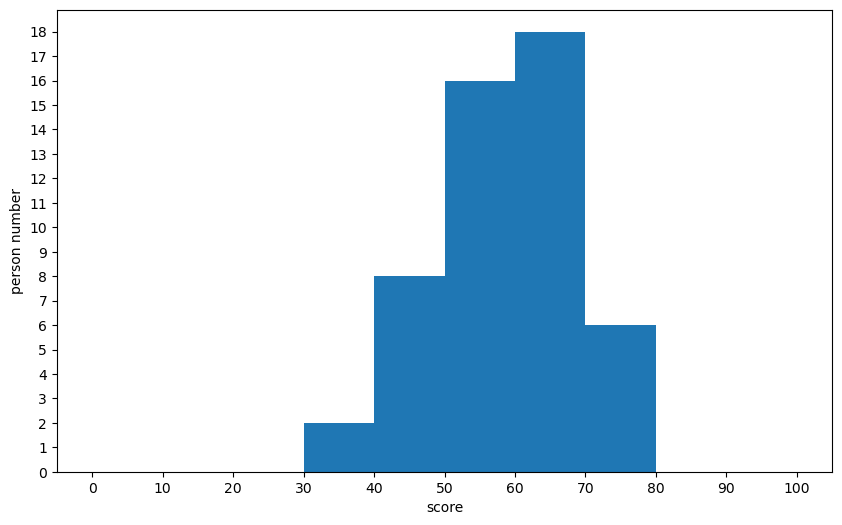

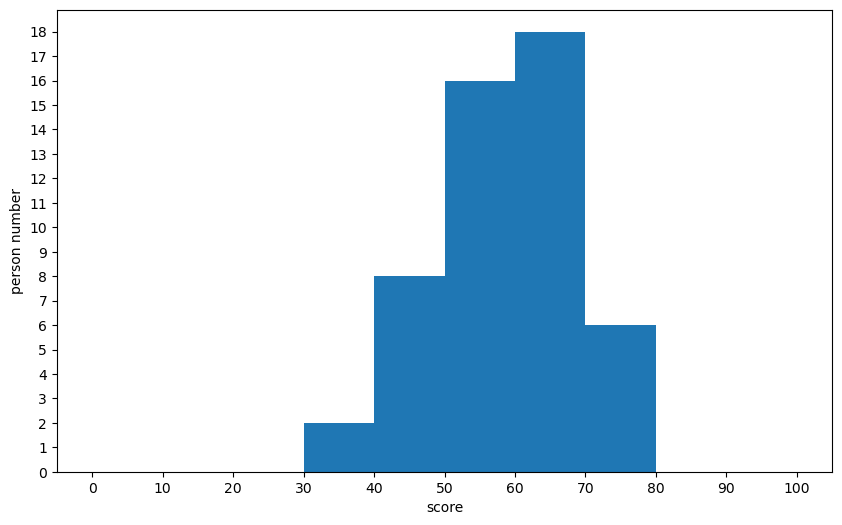

In [49]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freq,_,_=ax.hist(english_scores, bins=10, range=(0,100,))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()